In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_validate 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
# eda

In [3]:
df=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df.quantile([0,0.50, 0.95, 0.99, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.00,0.0,0.0,0.0,0.00,0.0,0.000,0.07800,21.0,0.0
0.50,3.0,117.0,72.0,23.00,30.5,32.000,0.37250,29.0,0.0
0.95,10.0,181.0,90.0,44.00,293.0,44.395,1.13285,58.0,1.0
0.99,13.0,196.0,106.0,51.33,519.9,50.759,1.69833,67.0,1.0
1.00,17.0,199.0,122.0,99.00,846.0,67.100,2.42000,81.0,1.0


In [9]:
#There are 768 record and 9 features in the dataset.
#Maybe seen there aren't nan values in the dataset but "Glucose","BloodPressure","Insulin","BMI"
#cant be 0 .there is missing value in there.
#There are 768 records and 9 features in the dataset. While there may not be any missing values in the dataset, it's important to note that 'Glucose,' 'BloodPressure,' 'Insulin,' and 'BMI' cannot be equal to 0; there may be missing values in these columns.

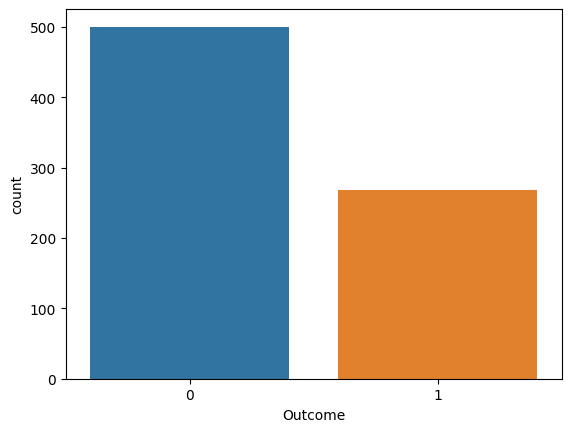

In [10]:
sns.countplot(x="Outcome", data=df)
plt.show()

In [11]:
100 * df["Outcome"].value_counts() / len(df)#dataframein %34 u diabetdir.

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [12]:
def plot_numerical_col(df, numerical_col): 
    df[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

In [13]:
df.groupby("Outcome").agg({"Pregnancies": "mean"}) #tek incelemek için
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby("Outcome").agg({numerical_col:"mean"}),end="\n\n\n")

In [14]:
cols=[col for col in df.columns if "Outcome" not in col] # without outcome
for col in cols:
    target_summary_with_num(df,"Outcome",col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




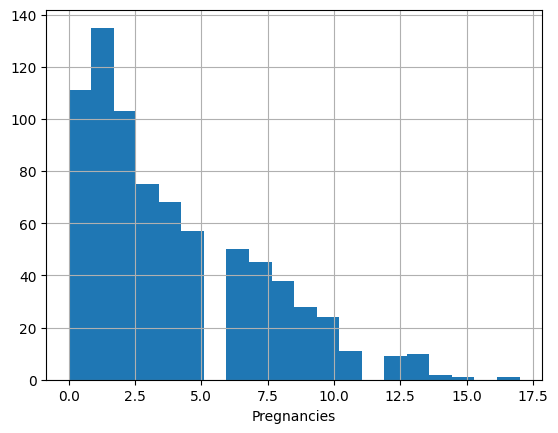

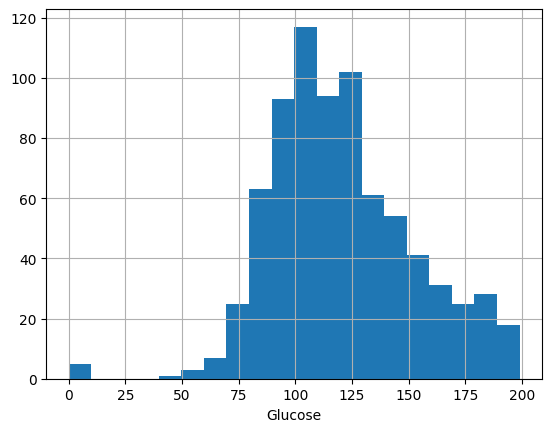

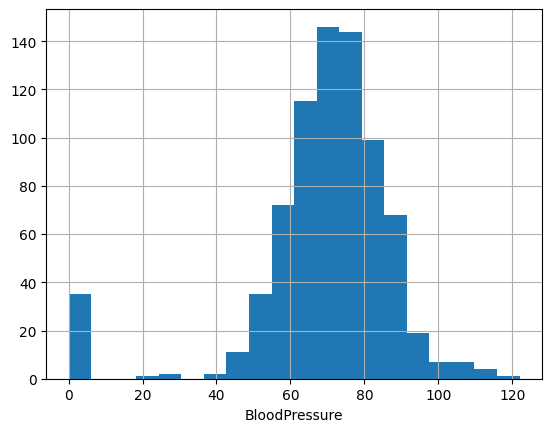

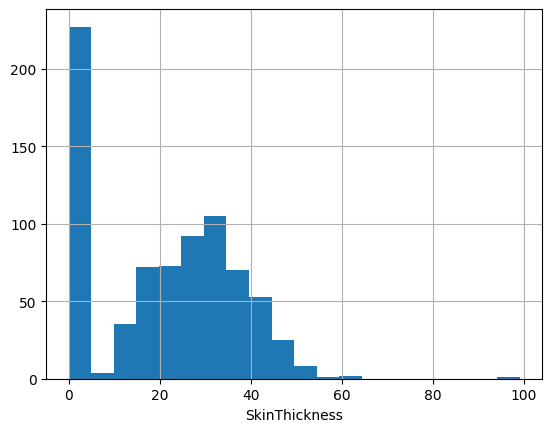

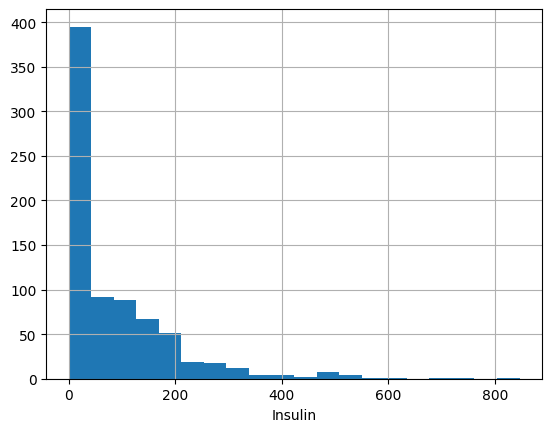

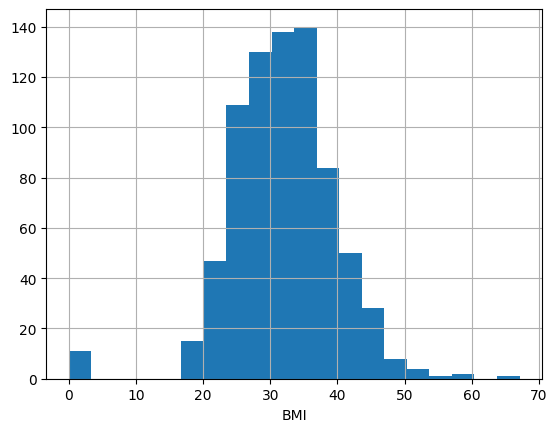

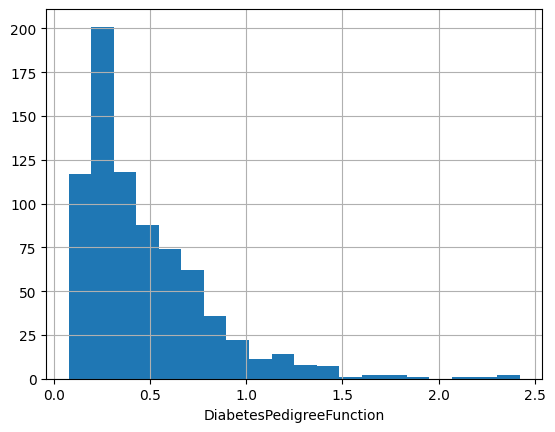

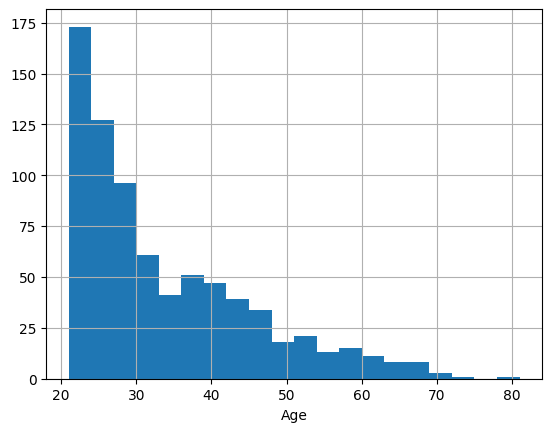

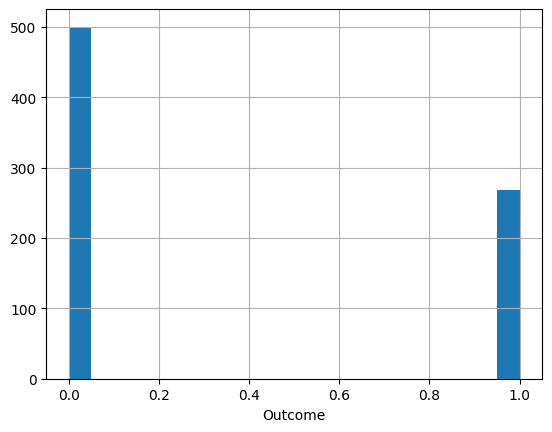

In [15]:
for col in df.columns:
    plot_numerical_col(df, col)

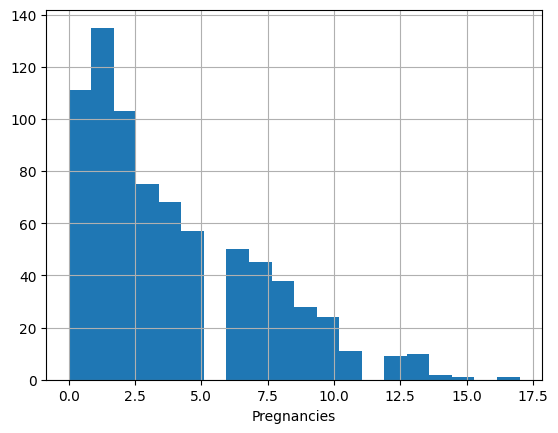

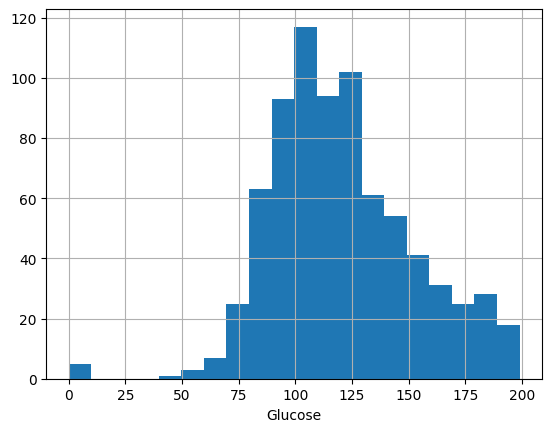

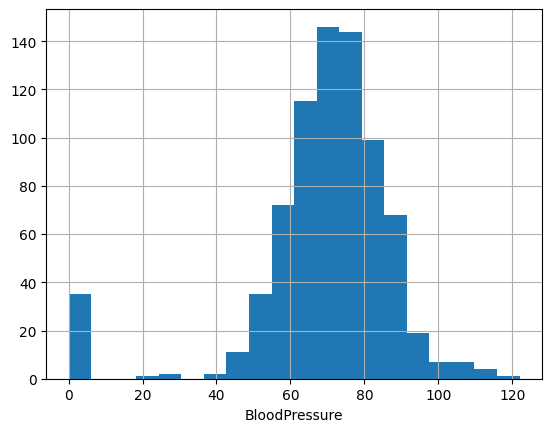

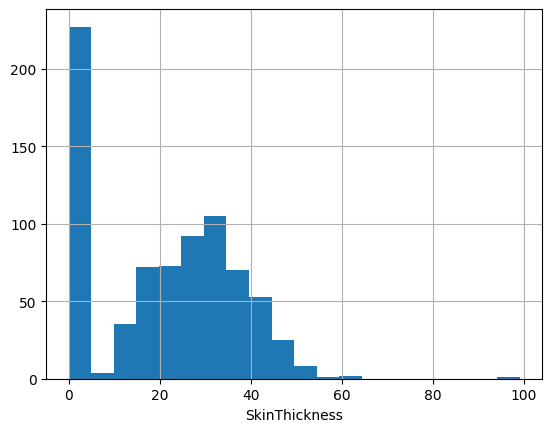

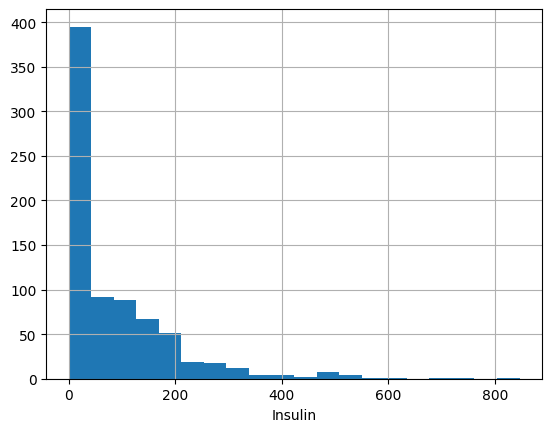

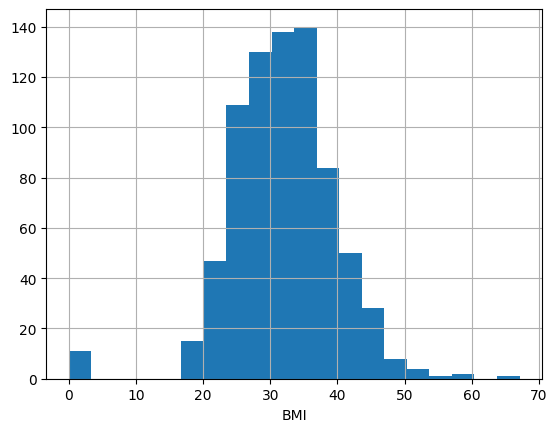

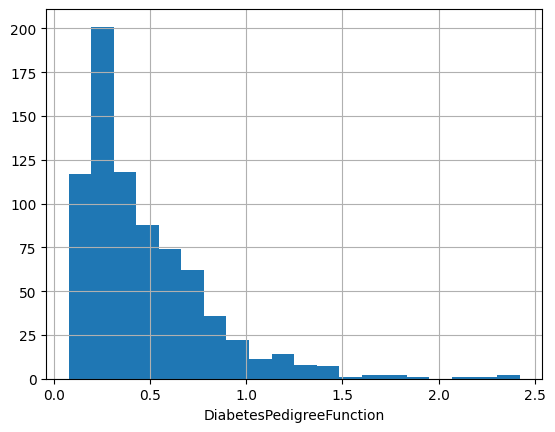

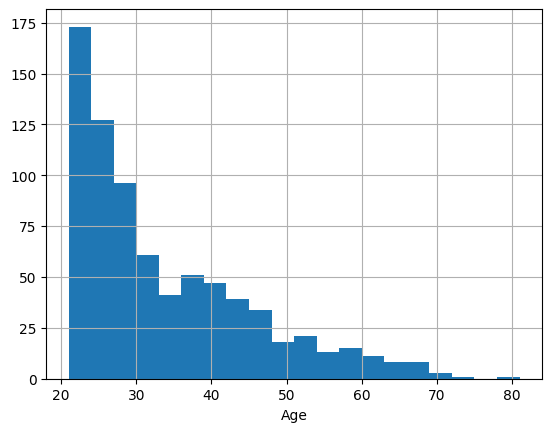

In [16]:
cols=[col for col in df.columns if "Outcome" not in col] # without outcome
for col in cols:
    plot_numerical_col(df,col)

<Axes: >

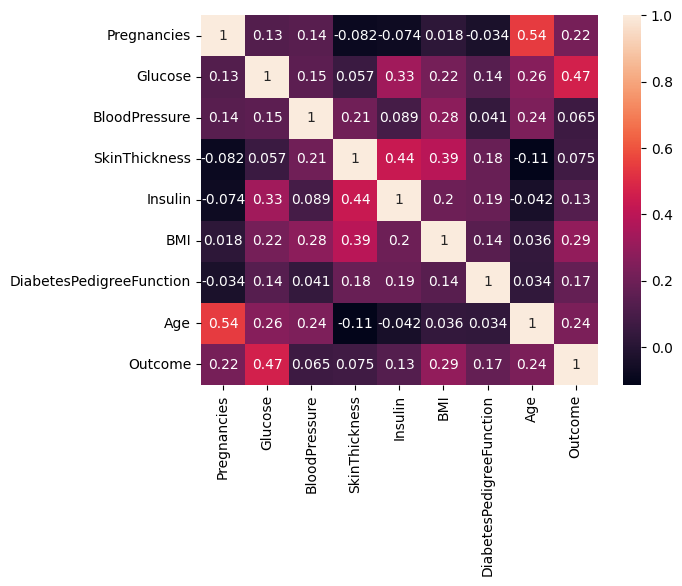

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
#data pre-processing

In [19]:
df.shape
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
dataset=df

In [21]:
dataset[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [22]:
dataset[["Glucose","BloodPressure","SkinThickness","Insulin"]] = dataset[["Glucose","BloodPressure","SkinThickness","Insulin"]].replace(0, np.nan)

In [23]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
dataset["Glucose"]=dataset["Glucose"].fillna(dataset["Glucose"].mean())
dataset["BloodPressure"]=dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean())
dataset["SkinThickness"]=dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean())
dataset["Insulin"]=dataset["Insulin"].fillna(dataset["Insulin"].mean())

In [25]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):#25 75 yerine yapılır.
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [26]:
for col in cols:
    print(col,":",check_outlier(dataset,col))

Pregnancies : False
Glucose : False
BloodPressure : False
SkinThickness : True
Insulin : True
BMI : False
DiabetesPedigreeFunction : False
Age : False


In [27]:
replace_with_thresholds(dataset,"Insulin")
replace_with_thresholds(dataset,"SkinThickness")
check_outlier(dataset,col)

False

In [28]:
for col in cols:     #targetsiz olan columnları standartlastırmak.
    dataset[col]=RobustScaler().fit_transform(df[[col]])


In [29]:
scaled=pd.DataFrame(dataset)
scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.765432,-0.012662,0.835226,0.000000,0.172043,0.665359,1.235294,1
1,-0.4,-0.790123,-0.387662,-0.021917,0.000000,-0.580645,-0.056209,0.117647,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-0.935484,0.783007,0.176471,1
3,-0.4,-0.691358,-0.387662,-0.879060,-1.807678,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.493827,-2.012662,0.835226,0.365710,1.193548,5.007843,0.235294,1


In [30]:
scaled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
scaled=df

In [32]:
#modeling

In [33]:
X=df.drop("Outcome",axis=1) #bağımsız değişkenler
y=df["Outcome"] #target

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression(random_state=18).fit(X,y)

In [35]:
logistic_reg.intercept_
logistic_reg.coef_

array([[ 0.5975981 ,  1.45306752, -0.0876365 ,  0.06637104, -0.01728558,
         0.68996021,  0.33681229,  0.20908072]])

In [36]:
#prediction

In [37]:
y_pred=logistic_reg.predict(X)
print(y_pred[0:10])#tahmin edilen target
print(y[0:10]) #gerçekte olan y

[1 0 1 0 1 0 0 0 1 0]
0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64


In [38]:
accuracy=logistic_reg.score(X,y_pred)
accuracy

1.0

In [39]:
conf=confusion_matrix(y,y_pred) 
conf

array([[442,  58],
       [117, 151]])

In [40]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



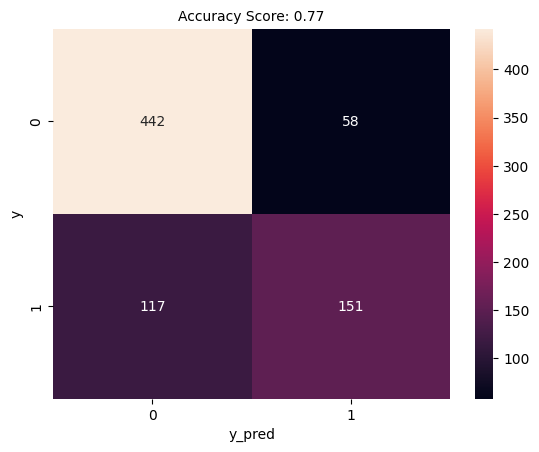

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



In [41]:
def plot_confusion_matrix(y, y_pred): 
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

print(classification_report(y, y_pred))

In [42]:
#accuracy:doğru sınıflandırma oranı.precision:1 olarak yaptığımız tahminler ne kadar başarılı recall:1 olanları ne kadar bilgisi

In [43]:
y_prob=logistic_reg.predict_proba(X)[:,1] #1 sınıfına ait olma olasılığı
roc_auc_score(y,y_prob) #roc_auc_score

0.8416492537313434

In [44]:
#model validation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17,test_size=0.20)

In [45]:
logistic_reg=LogisticRegression().fit(X_train,y_train)
y_pred=logistic_reg.predict(X_test)#tahmin edilen değerle

In [46]:
y_prob=logistic_reg.predict_proba(X_test)[:,1] #1 sınıfına ait olma olasılığı
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        97
           1       0.76      0.49      0.60        57

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [47]:
#model görmediği veriyi görünce başarısız görünüyor bu yüzden 10 katlı cross validaton yapılmalıdır.

In [48]:
roc_auc_score(y_test, y_prob) #roc_auc değeri artmış durumda random state değişirse accuracy de değişir.

0.8705009947549286

In [49]:
X=df.drop("Outcome",axis=1) #bütün veri ile en baştan 10 fol cross validation
y=df["Outcome"]
#veri seti az ise bütün veriyi kullananrak yapılabilir.

In [50]:
logistic_reg=LogisticRegression().fit(X,y)

In [51]:
cv_result=cross_validate(logistic_reg,X,y,cv=5,
                         scoring=["accuracy","precision","recall","f1","roc_auc"])

In [52]:
print(cv_result["test_accuracy"].mean()) #5 katlı olduğu için 5 değer geldi değerlerin ortalaması alınır
print(cv_result["test_precision"].mean())
print(cv_result["test_recall"].mean())
print(cv_result["test_f1"].mean())
cv_result["test_roc_auc"].mean()


0.7695696460402341
0.7202032051035373
0.5635220125786164
0.6310402420942383


0.8351278825995807

In [53]:
person=X.sample(1,random_state=18)
person
logistic_reg.predict(person)

array([0])